In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import re # Regular expression matching
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys, os, glob, pickle, gc
import math

mpl.rcParams['figure.figsize'] = (12,9)
mpl.rcParams['font.size'] = 26


In [74]:
from matplotlib.ticker import FuncFormatter
# ##########################################################
# Format tick labels using their exponent only... 
# ##########################################################
def formatter(x,pos):
    return format(np.log10(x), '.0f')

In [10]:
#mpl.rcParams['figure.figsize'] = (12,9)
mpl.rcParams['font.size'] = 28

# Plot area sizes...
left, width = 0.125, 0.7
bottom, height = 0.1, 0.85

plot_area = [left, bottom, width, height]

cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (.5,.5,.5,1.0)
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

bounds = np.linspace(-7.5,0,16)
ticks  =[-7,-6,-5,-4,-3,-2,-1,0]
norm   = mpl.colors.BoundaryNorm(bounds, cmap.N)

In [66]:
z=16.0;bs=2.636200000000000045e+02
i = 770

In [67]:
dotNorm = 10.0  # For dot-size scaling
comovbox = 5.0 

In [68]:
sbox = comovbox / (1.0 + z) * 0.71 # Create a box that's sbox kpc physical
print ("z=%.1lf, sbox=%.2lf"%(z,sbox))

z=16.0, sbox=0.21


In [69]:
x,y,zz = np.loadtxt("z%05.2f_SpCoord_%d.txt"%(z,i))
locs = np.loadtxt("spLocHaloOnly_%05.2f_%d.txt"%(z,i),skiprows=1) - np.array([x,y,zz]) # Normalize
mass = np.loadtxt("spMassHaloOnly_%05.2f_%d.txt"%(z,i),skiprows=1)
Z    = np.loadtxt("spZHaloOnly_%05.2f_%d.txt"%(z,i),skiprows=1) # SOLAR units in the file... 
PZ   = np.loadtxt("spPZHaloOnly_%05.2f_%d.txt"%(z,i),skiprows=1) # SOLAR units in the file... 
PPF  = np.loadtxt("spPPFHaloOnly_%05.2f_%d.txt"%(z,i),skiprows=1) 
Z[Z<1e-5] = 1e-8
Zf=Z/PPF
Zf[Zf<1e-5] = 1e-8
PZ[PZ<1e-5] = 1e-8
PPF[PPF<1e-8] = 1e-8

In [70]:
rng1 = (Z < 1.e-5)
rng2 = ((Z >= 1.e-5) & (Z < 1.e-3))
rng3 = ((Z >= 1.e-3) & (Z < 1.e-1))
rng4 = (Z >= 1.e-1)

rngf1 = (Zf < 1.e-5)
rngf2 = ((Zf >= 1.e-5) & (Zf < 1.e-3))
rngf3 = ((Zf >= 1.e-3) & (Zf < 1.e-1))
rngf4 = (Zf >= 1.e-1)

In [71]:
z1=np.log10(Z[rng1])
z2=np.log10(Z[rng2])
z3=np.log10(Z[rng3])
z4=np.log10(Z[rng4])

zf1=np.log10(Zf[rngf1])
zf2=np.log10(Zf[rngf2])
zf3=np.log10(Zf[rngf3])
zf4=np.log10(Zf[rngf4])

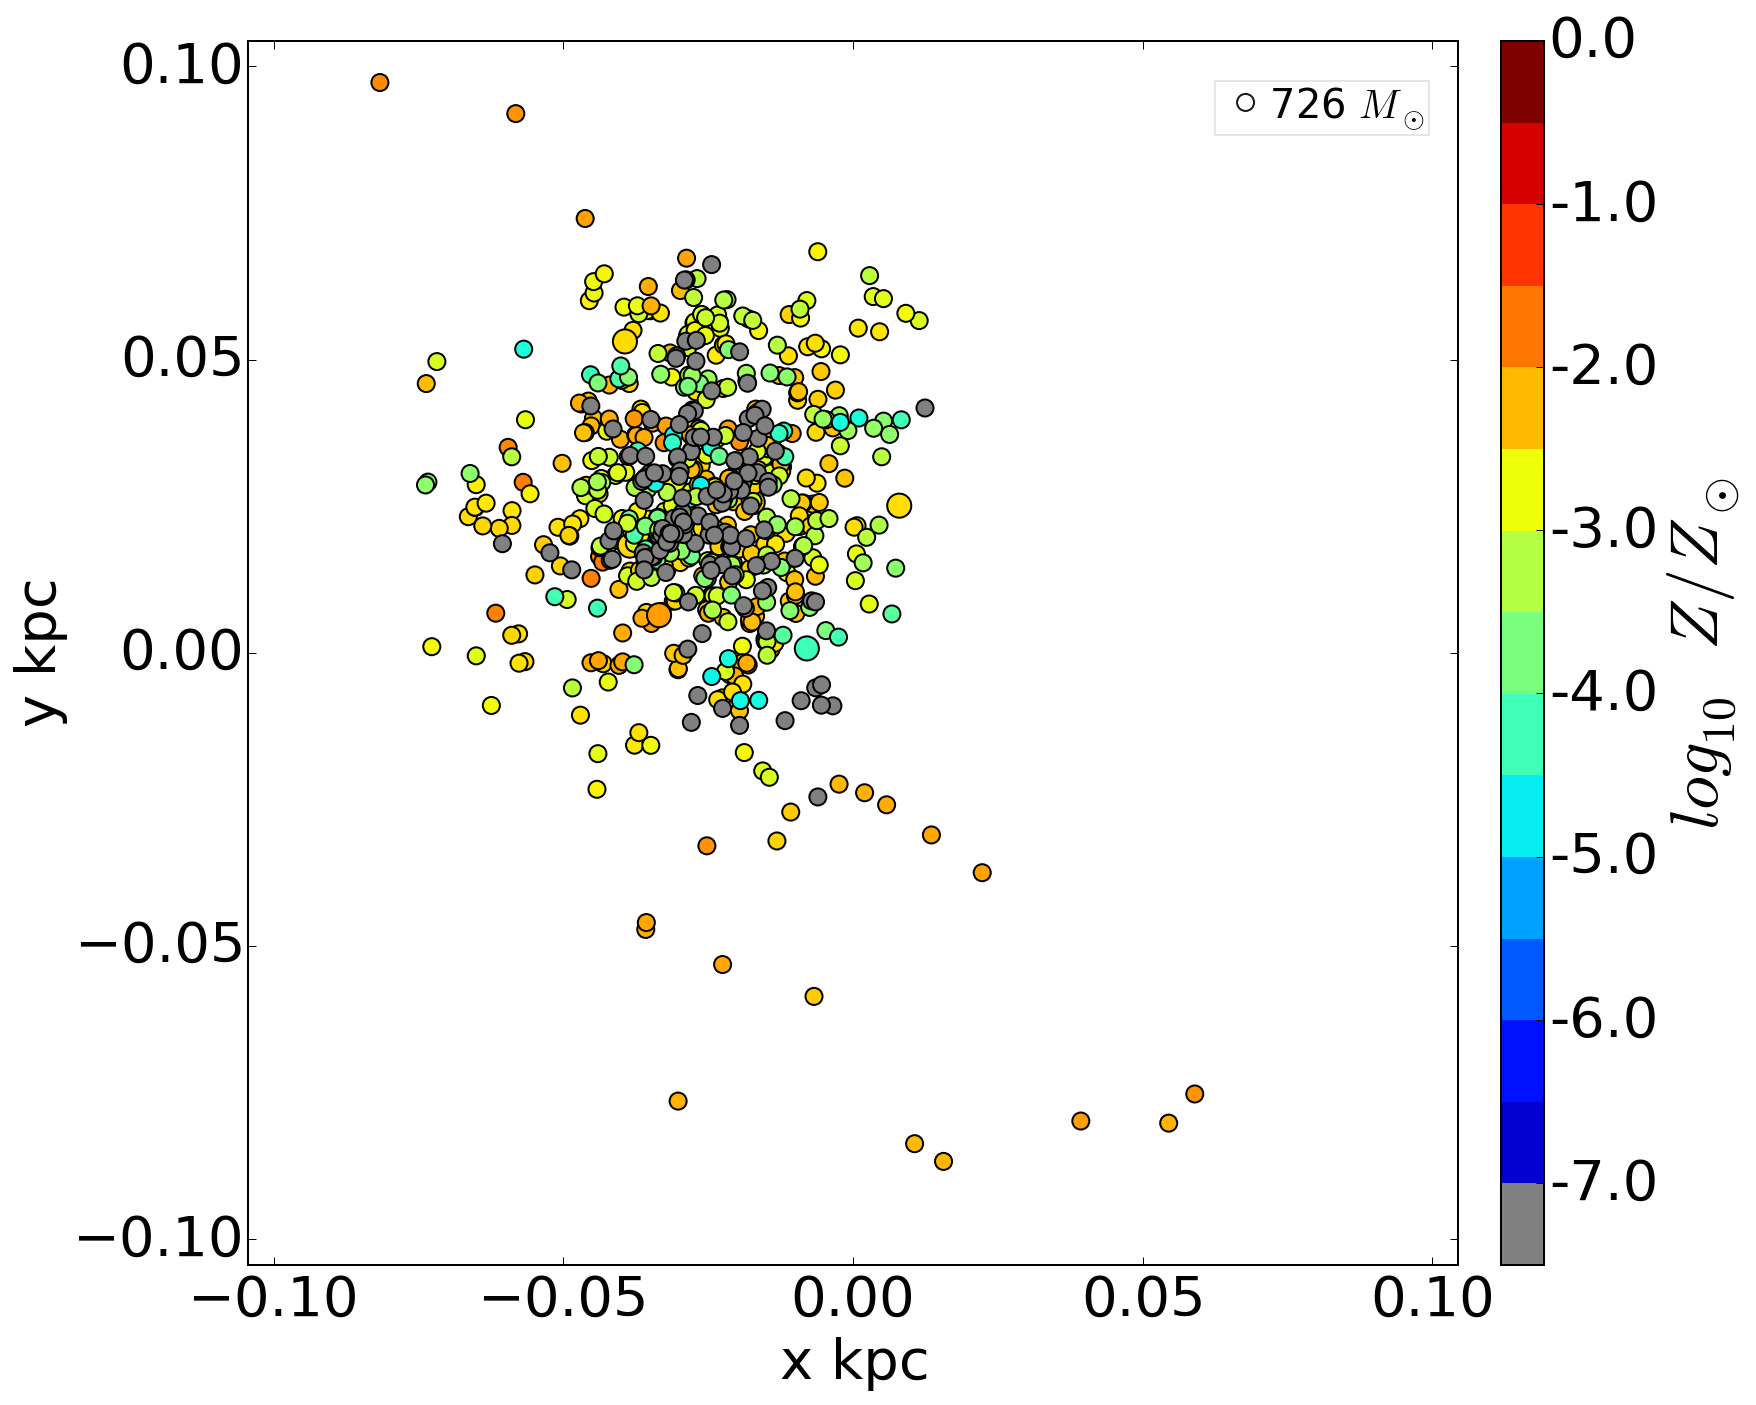

In [72]:
fig = plt.figure(figsize=(12, 10))
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
#plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
#plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
ax1 = plt.axes(plot_area)
ax1.set_xlim([-sbox/2.0,sbox/2.0])
ax1.set_ylim([-sbox/2.0,sbox/2.0])

xcoord = locs[:,0]; ycoord = locs[:,1]
ax1.scatter(xcoord[rng4], ycoord[rng4], s=mass[rng4]/dotNorm, c=z4, cmap=cmap,vmin=-7.5, vmax=0)
ax1.scatter(xcoord[rng3], ycoord[rng3], s=mass[rng3]/dotNorm, c=z3, cmap=cmap,vmin=-7.5, vmax=0)
ax1.scatter(xcoord[rng2], ycoord[rng2], s=mass[rng2]/dotNorm, c=z2, cmap=cmap,vmin=-7.5, vmax=0)
ax1.scatter(xcoord[rng1], ycoord[rng1], s=mass[rng1]/dotNorm, c=z1, cmap=cmap,vmin=-7.5, vmax=0)

ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                            ticks=ticks, boundaries=bounds, format='%.1f')
ax1.set_xlabel('x kpc')
ax1.set_ylabel('y kpc')

xpos = ax1.get_xlim()[1] - 0.15 * ax1.get_xlim()[1]
ypos = ax1.get_ylim()[1] - 0.125 * ax1.get_ylim()[1]
size = min(mass)
legStr = '    {:.0f}'.format(size)
legStr = legStr + " $M_{\odot}$"
bbox = {'facecolor':'white', 'alpha':0.1, 'pad':4}
ax1.annotate(legStr,xy=(xpos,ypos), xytext=(xpos+0.01, ypos), horizontalalignment='right', bbox=bbox, size=20)
ax1.scatter(np.array([xpos-0.021]), np.array([ypos+0.0025]), s=np.array([min(mass)])/dotNorm,facecolors='none')

#ax1.locator_params(nbins=5) # Setup the ticks according to the bins
    
ax5.set_ylabel('$log_{10}\; Z/Z_{\odot}$', size=34)

## plt.subplots_adjust(left=0.2, bottom=0.15, right=0.80, top=0.85, wspace=.15, hspace=.15)
#plt.savefig("SP_Z_locs_z=%.1lf-%i.pdf"%(z,indx))
plt.show()
plt.close()


# Compute histogram for the halo

In [ ]:
# Slightly offset bins so we can see the data.
xrange1 = np.logspace(-10,0,51) # 1e-10, 1e-9.8, 1e-9.6, ... 
xrange2 = np.logspace(-9.98,0.02,51) # 1e-9.96, 1e-9.76, 1e-9.56, ... 
xrange3 = np.logspace(-9.96,0.04,51) # 1e-9.92, 1e-9.72, 1e-9.52, ... 
xrange4 = np.logspace(-9.94,0.06,51) # 1e-9.92, 1e-9.72, 1e-9.52, ... 

In [76]:
temp = PZ
# Since we set all PZ and Z < Z_crit = 1e-8, we'd have PZ/Z = 1 in the case where there's Z ~ 0
# Fix this by setting PZ (temp) to 0 for subcritical PZ
temp[temp<1e-5] = 0.0

bins    = np.logspace(-10, 0, 51) # Log bins for histogram data 
psm     = np.zeros(len(bins)-1) # Pristine Stellar mass in that bin
tsm     = np.zeros(len(bins)-1) # total mass
zsm     = np.zeros(len(bins)-1) # total polluted mass
primsm  = np.zeros(len(bins)-1) # Primordial stellar mass
for indx2,j in enumerate(bins):
    if indx2 < len(bins)-1:
        cond = (snBlast.s['zsolar'] >= j) & (snBlast.s['zsolar'] < bins[indx2+1]) # This selects for sp's in the bin

        tsm[indx2] = np.sum(mass)
        psm[indx2] = np.sum(PPF * mass)
        # For sp's that are in our bin:
        #   Compute the polluted fraction (1-ppf)
        #   Compute the fraction of pristine metals: pzf/Z
        #   Compute the mass of polluted stars that are polluted only by pristine metals
        primsm[indx2] = np.sum((1.0-PPF * (temp / Z * mass)
        zsm = np.sum((1.0-PPF) * mass)

IndentationError: unexpected indent (<ipython-input-76-77fdc3d772d7>, line 11)

In [ ]:
plt.rcParams['figure.figsize'] = (13,11)
plt.rcParams['font.size'] = 28
# We're gonna cheat a bit and just move the histogram value to the lower edge of the bin... 
# Our bins are small so this shouldn't even show... 
histRect = [0.1, 0.1, .85, 0.85]
axHist   = plt.axes(histRect)
custom_formatter = FuncFormatter(formatter)

axHist.set_xscale('log')
axHist.set_yscale('log')
axHist.set_xlim([2*10**-7,1])
axHist.set_ylim([10**1.5,10**6.0])

axHist.set_xlabel("log $Z/Z_{\odot}$", size=28)
axHist.set_ylabel('log $M/M_{\odot}$', size=28)

axHist.plot(xrange1[1:51],totSPM,'b-d',  linewidth = 2.0)
axHist.plot(xrange2[1:51],ppfSPM, 'r--s', linewidth = 2.0 )
axHist.plot(xrange3[1:51],ppzSPM,'g-.^', linewidth = 2.5 )
axHist.xaxis.set_major_formatter(custom_formatter)
axHist.yaxis.set_major_formatter(custom_formatter)
axHist.fill_between(xrange2[1:51], 0, ppfSPM, facecolor='r', alpha=0.2)
axHist.fill_between(xrange3[1:51], 0, ppzSPM, facecolor='g', alpha=0.2)

axHist.grid(color='0.75', linestyle=':', linewidth=1.5)
axHist.legend(['Total','Pop III','Primordial Z'],loc='upper left', fontsize=24 )
plt.savefig("Histz="+z+"SFRegion.pdf")
plt.show()

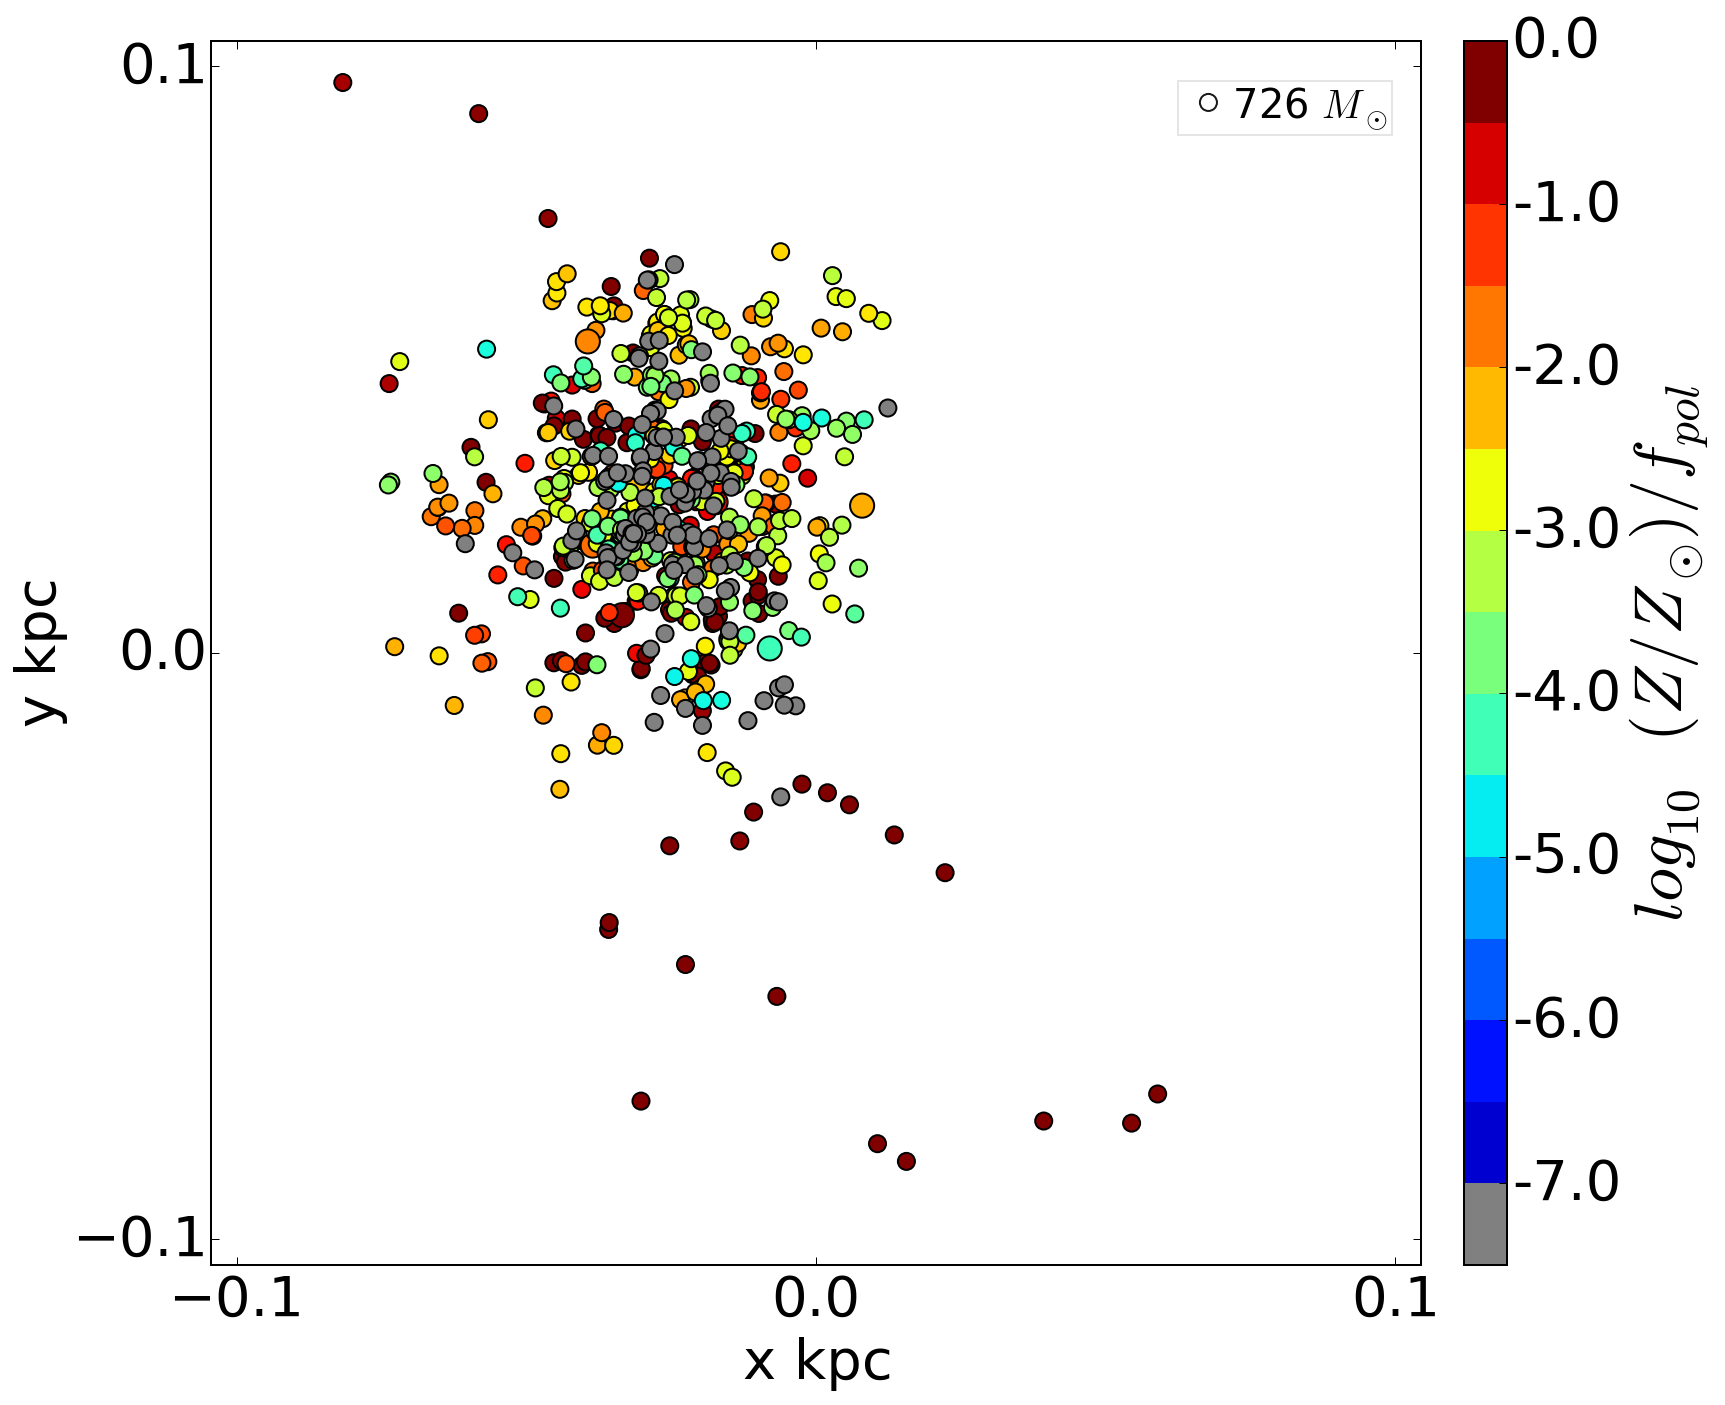

In [73]:
fig = plt.figure(figsize=(12, 10))
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
#plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
#plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
ax1 = plt.axes(plot_area)
ax1.set_xlim([-sbox/2.0,sbox/2.0])
ax1.set_ylim([-sbox/2.0,sbox/2.0])

xcoord = locs[:,0]; ycoord = locs[:,1]
ax1.scatter(xcoord[rngf4], ycoord[rngf4], s=mass[rngf4]/dotNorm, c=zf4, cmap=cmap,vmin=-7.5, vmax=0)
ax1.scatter(xcoord[rngf3], ycoord[rngf3], s=mass[rngf3]/dotNorm, c=zf3, cmap=cmap,vmin=-7.5, vmax=0)
ax1.scatter(xcoord[rngf2], ycoord[rngf2], s=mass[rngf2]/dotNorm, c=zf2, cmap=cmap,vmin=-7.5, vmax=0)
ax1.scatter(xcoord[rngf1], ycoord[rngf1], s=mass[rngf1]/dotNorm, c=zf1, cmap=cmap,vmin=-7.5, vmax=0)

ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                            ticks=ticks, boundaries=bounds, format='%.1f')

ax1.set_xlabel('x kpc')
ax1.set_ylabel('y kpc')

xpos = ax1.get_xlim()[1] - 0.15 * ax1.get_xlim()[1]
ypos = ax1.get_ylim()[1] - 0.125 * ax1.get_ylim()[1]
size = min(mass)
legStr = '    {:.0f}'.format(size)
legStr = legStr + " $M_{\odot}$"
bbox = {'facecolor':'white', 'alpha':0.1, 'pad':4}
ax1.annotate(legStr,xy=(xpos,ypos), xytext=(xpos+0.01, ypos), horizontalalignment='right', bbox=bbox, size=20)
ax1.scatter(np.array([xpos-0.021]), np.array([ypos+0.0025]), s=np.array([min(mass)])/dotNorm,facecolors='none')

ax1.locator_params(nbins=5) # Setup the ticks according to the bins
    
ax5.set_ylabel('$log_{10}\; (Z/Z_{\odot})/f_{pol}$', size=34)

## plt.subplots_adjust(left=0.2, bottom=0.15, right=0.80, top=0.85, wspace=.15, hspace=.15)
#plt.savefig("SP_Z_locs_z=%.1lf-%i.pdf"%(z,indx))
plt.show()
plt.close()
